In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

In [16]:
(X_train,y_train),(X_test,y_test) =datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
# _train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array?


y_train = y_train.reshape(-1,)
y_train[:5]



array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:


y_test = y_test.reshape(-1,)



In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
# Let's plot some images to see what they are?
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

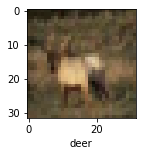

In [23]:
plot_sample(X_train,y_train,3)

In [24]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to
# 255. Hence to normalize in 0-->1 range, we need to divide it by 255



###### Normalizing the training data

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

##### Build simple artificial neural network for image classification

In [30]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 123s 76ms/step - loss: 1.8124 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.6240 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5414 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4801 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4311 - accuracy: 0.4969


###### You can see that at the end of 5 epochs, accuracy is at around 49%

In [31]:


from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))



313/313 [==============================] - 6s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.44      0.52      1000
           1       0.62      0.51      0.56      1000
           2       0.38      0.36      0.37      1000
           3       0.37      0.27      0.31      1000
           4       0.46      0.35      0.40      1000
           5       0.39      0.37      0.38      1000
           6       0.44      0.67      0.53      1000
           7       0.69      0.39      0.50      1000
           8       0.67      0.52      0.59      1000
           9       0.34      0.79      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



###### Now let us build a convolutional neural network to train our images

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [35]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 46ms/step - loss: 1.4477 - accuracy: 0.4804
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0982 - accuracy: 0.6178
Epoch 3/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.9749 - accuracy: 0.6623
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8846 - accuracy: 0.6942
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8193 - accuracy: 0.7159
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7675 - accuracy: 0.7363
Epoch 7/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7185 - accuracy: 0.7514
Epoch 8/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6773 - accuracy: 0.7657
Epoch 9/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6384 - accuracy: 0.7781
Epoch 10/10
1563/1563 [==============================] - 64s 41m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. 
CNN's are best for image classification and gives superb accuracy. Also computation is much less compared
to simple ANN as maxpooling reduces the image dimensions while still preserving the features


In [36]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 14ms/step - loss: 0.9128 - accuracy: 0.6985


[0.9128203988075256, 0.6984999775886536]

In [37]:


y_pred = cnn.predict(X_test)
y_pred[:5]



313/313 [==============================] - 6s 18ms/step


array([[2.46418151e-03, 2.55366704e-05, 7.85763143e-04, 7.94237375e-01,
        1.47289643e-03, 1.96434483e-01, 2.93997908e-03, 1.20078119e-04,
        7.13962654e-04, 8.05870804e-04],
       [4.90460196e-04, 8.68164748e-02, 2.33647756e-06, 1.11057682e-06,
        1.49417872e-07, 4.66040895e-09, 3.29715206e-08, 6.70677824e-09,
        9.12653685e-01, 3.56851269e-05],
       [3.27941358e-01, 1.11901954e-01, 1.21901359e-03, 1.22766737e-02,
        2.92972988e-03, 1.70037872e-03, 6.52551325e-03, 4.17586276e-03,
        4.67781931e-01, 6.35475293e-02],
       [9.50140178e-01, 7.56691024e-03, 1.58773444e-03, 2.42678128e-04,
        2.75500381e-04, 1.23902655e-05, 3.37150705e-05, 1.37563511e-05,
        4.01229374e-02, 4.37961080e-06],
       [8.52701803e-08, 3.58550551e-07, 1.22918244e-02, 2.52794493e-02,
        1.89980850e-01, 7.02501624e-04, 7.71744370e-01, 6.67133051e-08,
        5.08843129e-07, 7.96823940e-09]], dtype=float32)

In [38]:


y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]



[3, 8, 8, 0, 6]

In [39]:


y_test[:5]



array([3, 8, 8, 0, 6], dtype=uint8)

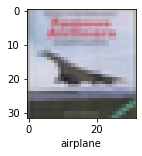

In [40]:
plot_sample(X_test, y_test,3)

In [44]:


classes[y_classes[7]]



'frog'

In [43]:


classes[y_classes[7]]



'frog'